# Import Libraries

In [1]:
from utilities import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

# Initializations

In [2]:
# initialize_bboxes_file(file_path = '../../CelebA/metadata/list_bbox_celeba.txt')
initialize_dlib_shape_predictor("../../Face Landmark Detection Pre-trained models/shape_predictor_81_face_landmarks.dat")

# Low level features

In [3]:
df_attributes = pd.read_csv("../../../LFW/metadata/modified_attributes.txt")

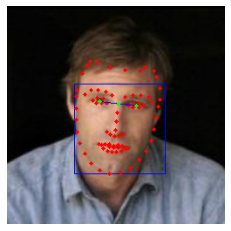

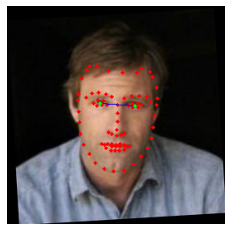

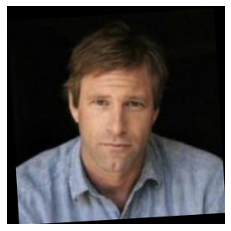

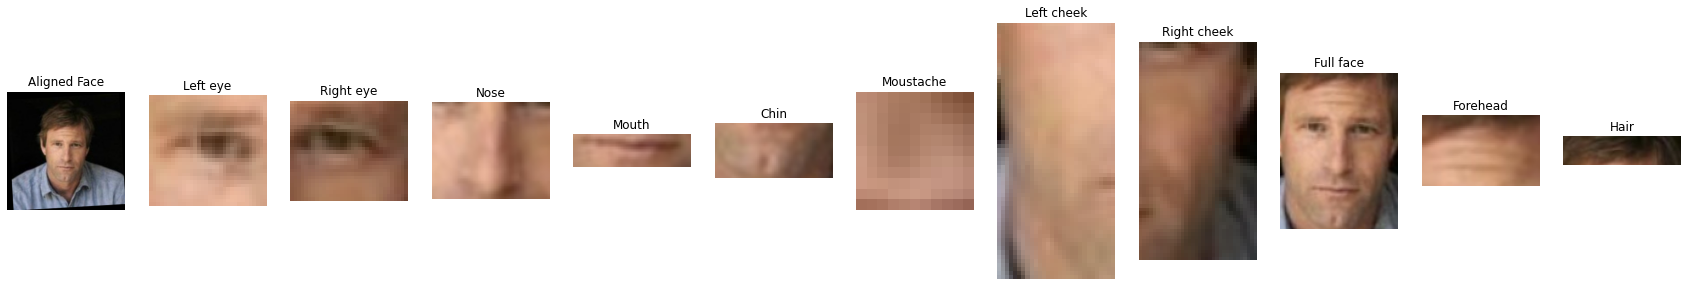

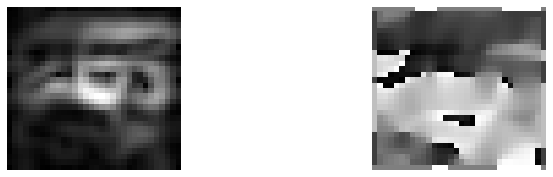

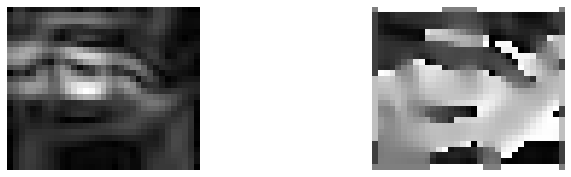

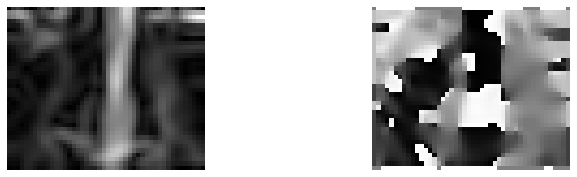

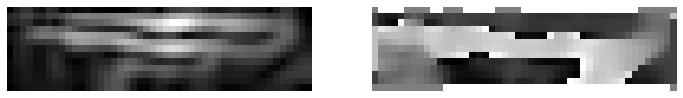

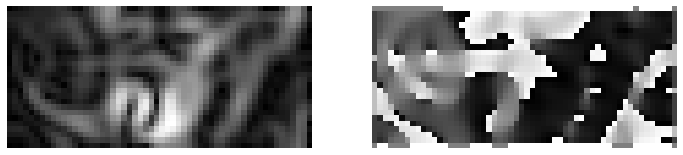

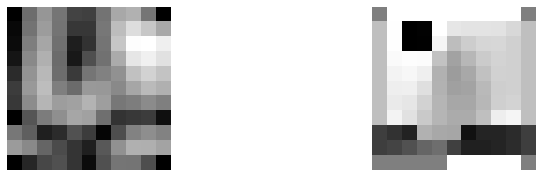

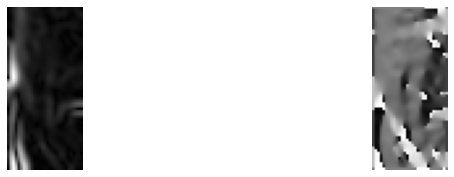

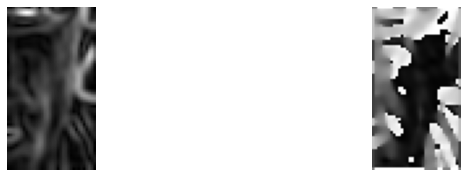

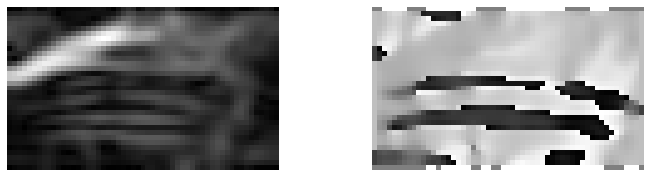

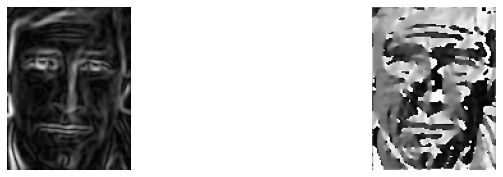

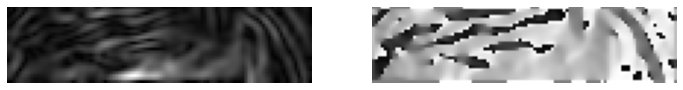

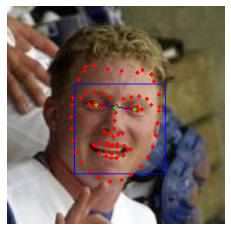

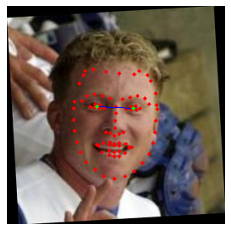

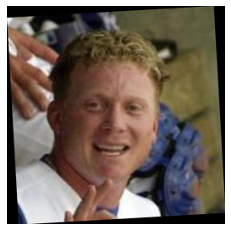

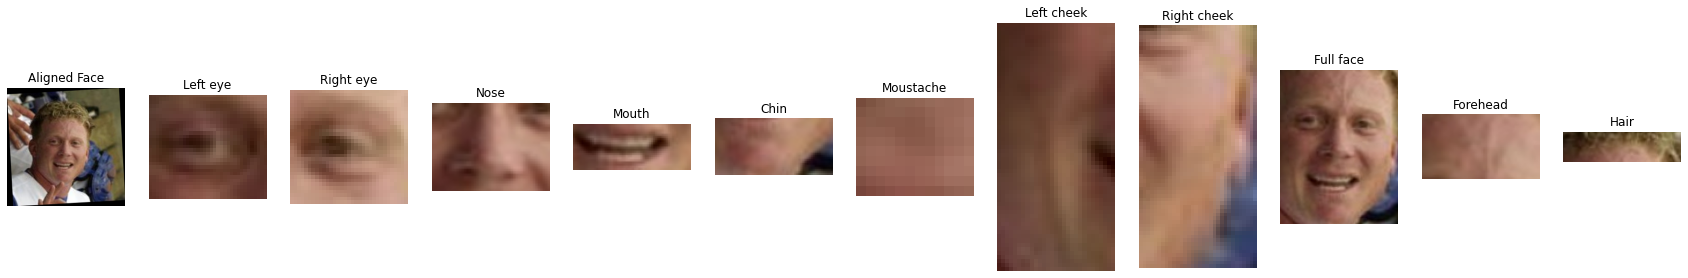

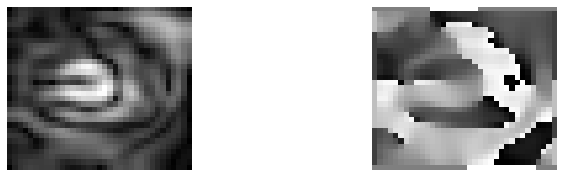

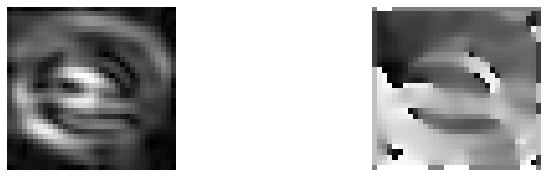

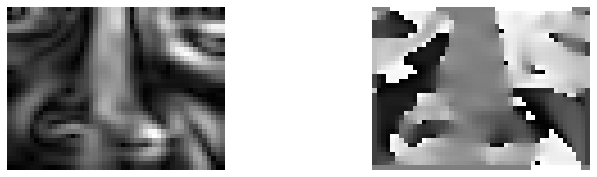

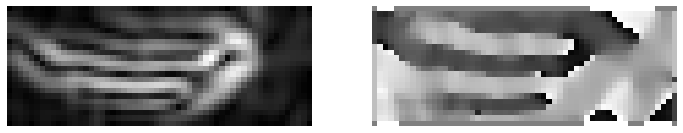

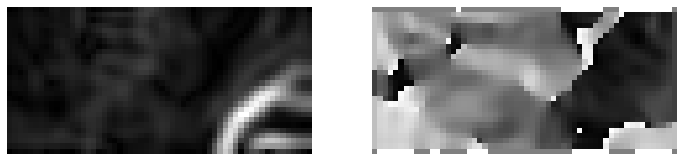

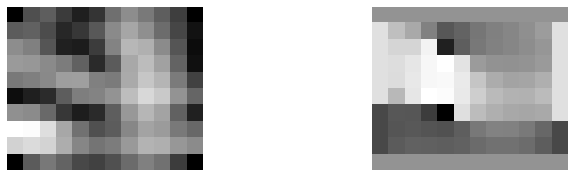

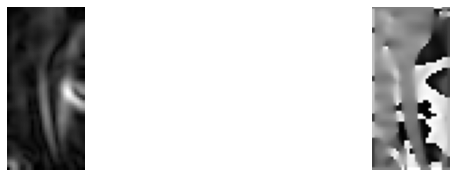

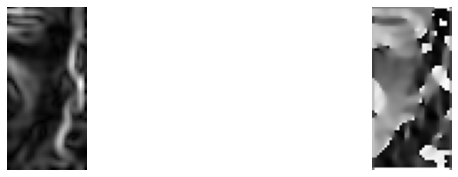

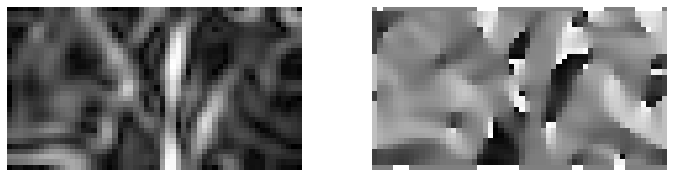

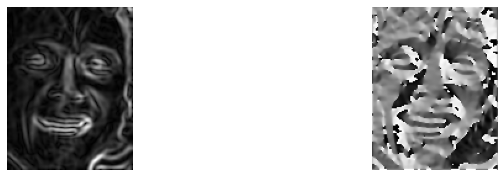

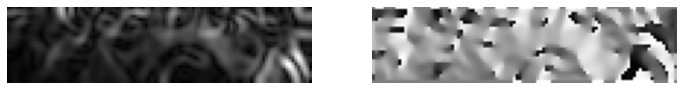

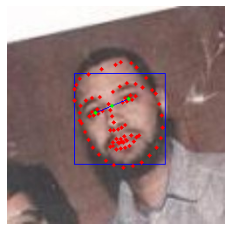

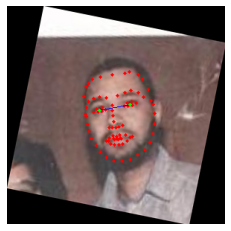

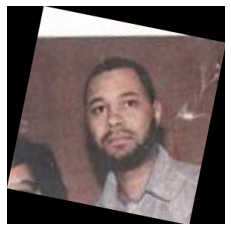

KeyboardInterrupt: 

In [4]:
# for i in tqdm(sorted(glob("../../../LFW/images/lfw/*/"))):
#     for file_name in sorted(glob(folder_name + "*")):
for j in range(df_attributes.shape[0]):
    file_name = "../../../LFW/images/lfw/" + df_attributes.loc[j, 'person'].replace(" ", "_") + "/" + df_attributes.loc[j, 'person'].replace(" ", "_") + "_" + '{0:04d}'.format(df_attributes.loc[j, 'imagenum']) + ".jpg"
    try:
        # Face extraction
        img_face_extracted = face_extraction_lfw(cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB))
        # Face alignment
        img_face_aligned, shape = face_alignment_dlib(img_face_extracted, display_intermediate_results = True)
        
        ## Uncomment below to see the aligned eyes
        img_face_aligned_copy = img_face_aligned.copy()
        for j in range(len(shape)):
            cv2.circle(img_face_aligned_copy, tuple(shape[j]), 2, (255, 0, 0), -1)
        left_eye_center, right_eye_center = get_center_eyes_dlib(shape)
        cv2.line(img_face_aligned_copy, tuple(left_eye_center), tuple(right_eye_center), (0, 0, 255), 1)
        cv2.circle(img_face_aligned_copy, tuple(left_eye_center), 2, (0, 255, 0), -1)
        cv2.circle(img_face_aligned_copy, tuple(right_eye_center), 2, (0, 255, 0), -1)
        plt.imshow(img_face_aligned_copy)
        plt.axis('off')
        plt.show()

        plt.imshow(img_face_aligned)
        plt.axis('off')
        plt.show()

        # Low level features extraction
        ''' features = 
        rgb_left_eye, hsv_left_eye, grad_mag_left_eye, grad_orien_left_eye, \
        rgb_right_eye, hsv_right_eye, grad_mag_right_eye, grad_orien_right_eye, \
        rgb_nose, hsv_nose, grad_mag_nose, grad_orien_nose, \
        rgb_mouth, hsv_mouth, grad_mag_mouth, grad_orien_mouth, \
        rgb_chin, hsv_chin, grad_mag_chin, grad_orien_chin, \
        rgb_moustache, hsv_moustache, grad_mag_moustache, grad_orien_moustache, \
        rgb_left_cheek, hsv_left_cheek, grad_mag_left_cheek, grad_orien_left_cheek, \
        rgb_right_cheek, hsv_right_cheek, grad_mag_right_cheek, grad_orien_right_cheek, \
        rgb_forehead, hsv_forehead, grad_mag_forehead, grad_orien_forehead, \
        rgb_full_face, hsv_full_face, grad_mag_full_face, grad_orien_full_face, \
        rgb_hair, hsv_hair, grad_mag_hair, grad_orien_hair
        '''
        features = extract_low_level_features_research_paper(img_face_aligned, shape, display_intermediate_results = True)
    except Exception as e:
        pass
print("Completed")

# Clear resources

In [6]:
# close_bboxes_file()
file_exception.close()